### Model Building and Evaluation

In this notebook, we will train ml models using our transformed dataset and visualize the results as well.

1. XGBoost

This script builds and evaluates an XGBoost classifier to detect land mines based on engineered features. It:

Loads and preprocesses the dataset (transformed_land_mines.csv)

Uses XGBoostClassifier with custom hyperparameters

Trains on 80% of the data and tests on 20%

Outputs accuracy, classification report, and confusion matrix


✅ XGBoost Accuracy: 0.5294
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.92      0.92      0.92        12
           2       0.54      0.44      0.48        16
           3       0.30      0.55      0.39        11
           4       0.45      0.28      0.34        18

    accuracy                           0.53        68
   macro avg       0.56      0.56      0.55        68
weighted avg       0.55      0.53      0.53        68



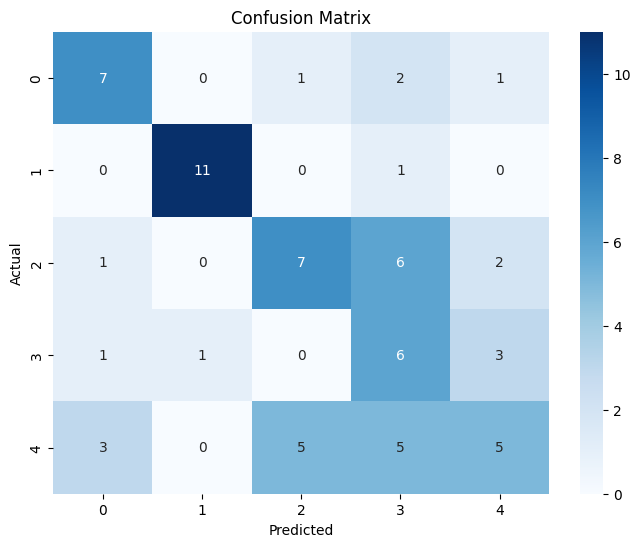

['xgboost_model.pkl']

In [3]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M", "V"])
y = df["M"] - 1  # Adjusting labels if needed

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = XGBClassifier(
    eval_metric="logloss",  
    booster="dart",  
    n_estimators=1000,  
    max_depth=10,  
    learning_rate=0.7,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=18,
    reg_alpha=0.6,
)

# Train model
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ XGBoost Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save model
joblib.dump(model, "xgboost_model.pkl")


XGBoost Hyperparameter Tuning with Optuna

In [ ]:
import pandas as pd
import optuna
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load data
df = pd.read_csv("transformed_land_mines.csv")
X = df.drop(columns=["M", "V"])
y = df["M"] - 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optuna objective function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.7),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 100.0, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        "eval_metric": "mlogloss",
    }

    model = XGBClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# Run optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Best params and model
print("✅ Best Hyperparameters:", study.best_params)
print(f"🎯 Best Accuracy: {study.best_value:.4f}")

# Final model
final_model = XGBClassifier(**study.best_params, random_state=42, eval_metric="mlogloss")
final_model.fit(X_train, y_train)

# Save final model
joblib.dump(final_model, "xgboost_optuna_model.pkl")
print("💾 Model saved as 'xgboost_optuna_model.pkl'")


CatBoost Classifier
CatBoost is a gradient boosting library specifically optimized for categorical feature handling and high performance. It stands for Categorical Boosting and provides state-of-the-art performance, handling categorical features automatically without needing to pre-process them into one-hot encoding or numerical transformations. CatBoost is a fast and efficient implementation of gradient boosting which is often used for classification and regression tasks.

Learning rate set to 0.238816
0:	learn: 0.5592593	total: 48ms	remaining: 11.9s
50:	learn: 0.8592593	total: 97.9ms	remaining: 382ms
100:	learn: 0.9703704	total: 143ms	remaining: 211ms
150:	learn: 0.9925926	total: 189ms	remaining: 124ms
200:	learn: 1.0000000	total: 271ms	remaining: 66.1ms
249:	learn: 1.0000000	total: 314ms	remaining: 0us
✅ CatBoost Accuracy: 0.5882
🕒 Training Time: 0.38 seconds
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.85      0.92      0.88        12
           2       0.53      0.50      0.52        16
           3       0.40      0.55      0.46        11
           4       0.45      0.28      0.34        18

    accuracy                           0.59        68
   macro avg       0.59      0.63      0.60        68
weighted avg       0.58      0.59      0.57        68



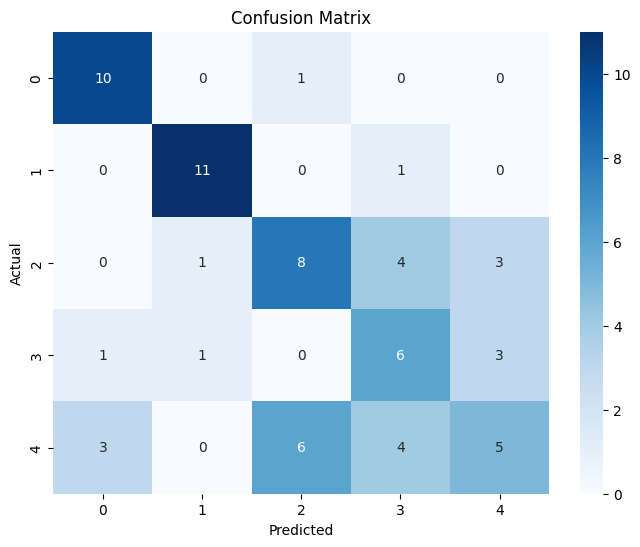

['catboost_model.pkl']

In [4]:
import pandas as pd
import joblib
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M", "V"])
y = df["M"] - 1

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = CatBoostClassifier(iterations=250, eval_metric="Accuracy", verbose=50)

# Train
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ CatBoost Accuracy: {accuracy:.4f}")
print(f"🕒 Training Time: {end_time - start_time:.2f} seconds")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save model
joblib.dump(model, "catboost_model.pkl")


Catboost Hyperparameter Tuning with Optuna

In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters to tune
    iterations = trial.suggest_int('iterations', 100, 1000)  # Number of trees
    depth = trial.suggest_int('depth', 3, 12)  # Depth of the trees
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)  # Learning rate
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1e-5, 10)  # L2 regularization term
    border_count = trial.suggest_int('border_count', 32, 255)  # Number of splits for categorical features
    bagging_temperature = trial.suggest_uniform('bagging_temperature', 0, 1)  # Controls bagging (randomness)
    
    # Initialize CatBoostClassifier with suggested parameters
    model = CatBoostClassifier(
        iterations=iterations,
        depth=depth,
        learning_rate=learning_rate,
        l2_leaf_reg=l2_leaf_reg,
        border_count=border_count,
        bagging_temperature=bagging_temperature,
        cat_features=[],  # Adjust this if you have categorical features
        random_state=42,
        verbose=0  # Disable internal output during training
    )
    
    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create Optuna study and optimize the hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)  # You can adjust n_trials for more trials

# Output best hyperparameters and best accuracy
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best Accuracy: {study.best_value:.4f}")

# Train the final model with the best hyperparameters
best_params = study.best_params
final_model = CatBoostClassifier(**best_params, random_state=42, verbose=0)
final_model.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final CatBoost Accuracy: {accuracy:.4f}")


Training: Logistic Regression

/workspaces/FDS_MiniProject/fds/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Logistic Regression Accuracy: 0.4412
🕒 Training Time: 0.02 seconds
              precision    recall  f1-score   support

           0       0.52      0.87      0.65        15
           1       0.88      1.00      0.93        14
           2       0.25      0.15      0.19        13
           3       0.00      0.00      0.00        13
           4       0.08      0.08      0.08        13

    accuracy                           0.44        68
   macro avg       0.34      0.42      0.37        68
weighted avg       0.36      0.44      0.39        68



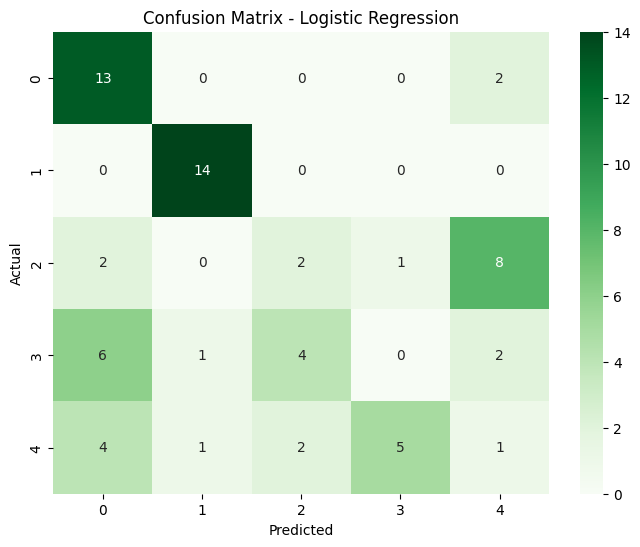

🎉 Model saved as 'logistic_regression_model.pkl'


In [5]:
import pandas as pd
import time
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M", "V_log"])
y = df["M"] - 1  # Adjust target variable if necessary

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="auto")

# Train
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Logistic Regression Accuracy: {accuracy:.4f}")
print(f"🕒 Training Time: {end_time - start_time:.2f} seconds")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Save model
joblib.dump(model, "logistic_regression_model.pkl")
print("🎉 Model saved as 'logistic_regression_model.pkl'")


Logistic Regression Hyperparameter Tuning with Optuna

In [ ]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters to tune
    C = trial.suggest_loguniform('C', 1e-5, 100)  # Regularization strength (C parameter)
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga', 'newton-cg'])  # Solver choice
    max_iter = trial.suggest_int('max_iter', 50, 500)  # Maximum number of iterations for convergence
    
    # Initialize Logistic Regression with suggested parameters
    model = LogisticRegression(
        C=C,
        solver=solver,
        max_iter=max_iter,
        random_state=42
    )

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create Optuna study and optimize the hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Output best hyperparameters and accuracy
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best Accuracy: {study.best_value:.4f}")

# Train the final model with the best hyperparameters
best_params = study.best_params
final_model = LogisticRegression(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Logistic Regression Accuracy: {accuracy:.4f}")


RandomForest Classifier

Random Forest is a powerful ensemble learning method that is used for both classification and regression tasks. It works by creating multiple decision trees during training and merging their outputs (majority vote in classification or averaging in regression) to improve performance and control overfitting.

1. Ensemble Learning:

Random Forest is an ensemble method, meaning it combines multiple individual models (decision trees) to produce a more accurate and robust prediction.

2. Bootstrap Aggregating (Bagging):

Random Forest uses a technique called bagging, where each tree is trained on a random subset of the data with replacement. This helps to reduce variance and prevent overfitting.

3. Feature Randomness:

At each split in a tree, Random Forest considers a random subset of features, which helps to make the trees more diverse and reduces correlation between them.

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M", "V"])
y = df["M"] - 1  # Adjusting target as M - 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the final model (or use default hyperparameters here)
final_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=15, 
    min_samples_split=2, 
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

# Train the model
final_model.fit(X_train, y_train)

# Evaluate model
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ RandomForest Accuracy: {accuracy:.4f}")
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Save the trained model
joblib.dump(final_model, "randomforest_model.pkl")
print("🎉 Model saved as 'randomforest_model.pkl'")


RandomForest Hyperparameter Tuning with Optuna

In [ ]:
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M", "V"])
y = df["M"] - 1  # Adjusting target as M - 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Objective function to optimize hyperparameters
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 10, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create study and optimize
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150)

# Output best hyperparameters and accuracy
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best Accuracy: {study.best_value:.4f}")

# Train final model with best hyperparameters
best_params = study.best_params
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate final model
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Final RandomForest Accuracy: {accuracy:.4f}")

# Save the final model
joblib.dump(final_model, "best_randomforest_model_optuna.pkl")
print("🎉 Model saved as 'best_randomforest_model_optuna.pkl'")


Extra Trees (or Extremely Randomized Trees) is an ensemble learning technique based on decision trees. It's very similar to Random Forests, but with more aggressive randomness. The main difference between Extra Trees and Random Forest is how the decision trees are built.


1. Randomness in Split Selection:

In Random Forests, at each split, the algorithm chooses the best feature among a subset of randomly selected features and splits the node based on that feature.

In Extra Trees, the split at each node is made by selecting a random feature and then randomly choosing a split point for that feature. This additional randomness makes Extra Trees trees more uncorrelated, which can sometimes lead to better generalization on certain datasets.

2. Fully Random Trees:

Unlike in Random Forests where the best possible split is chosen, Extra Trees adds additional randomness in the construction of trees by not only choosing random features but also randomizing the threshold for the best split.

This often leads to quicker training times and can reduce overfitting.

✅ ExtraTrees Accuracy: 0.4706
🕒 Training Time: 0.25 seconds
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.85      0.92      0.88        12
           2       0.25      0.19      0.21        16
           3       0.36      0.45      0.40        11
           4       0.23      0.17      0.19        18

    accuracy                           0.47        68
   macro avg       0.46      0.53      0.49        68
weighted avg       0.43      0.47      0.44        68



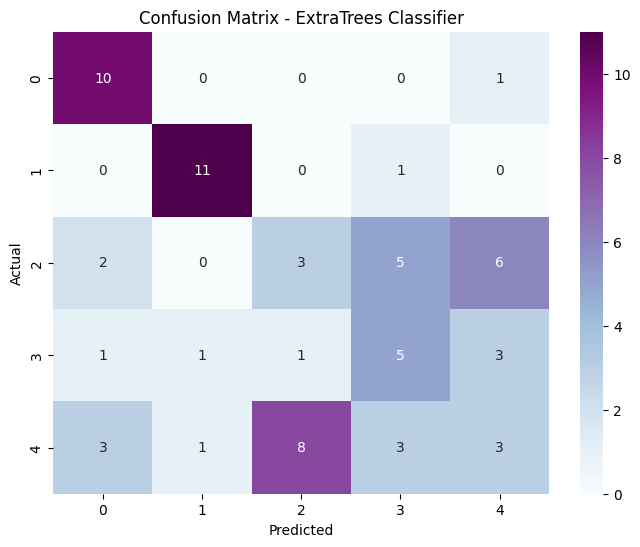

🎉 Model saved as 'extratrees_model.pkl'


In [9]:
import pandas as pd
import time
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M", "V"])
y = df["M"] - 1

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = ExtraTreesClassifier(n_estimators=250, random_state=42)

# Train
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ ExtraTrees Accuracy: {accuracy:.4f}")
print(f"🕒 Training Time: {end_time - start_time:.2f} seconds")
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ExtraTrees Classifier")
plt.show()

# Save model
joblib.dump(model, "extratrees_model.pkl")
print("🎉 Model saved as 'extratrees_model.pkl'")


Extra Trees Hyperparameter Tuning with Optuna

In [ ]:
import optuna
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load and prepare data
df = pd.read_csv("transformed_land_mines.csv")
X = df.drop(columns=["M", "V"])
y = df["M"] - 1

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)



# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Initialize Extra Trees classifier with suggested parameters
    model = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42
    )

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create Optuna study and optimize the hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Output best hyperparameters and accuracy
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best Accuracy: {study.best_value:.4f}")

# Train the final model with the best hyperparameters
best_params = study.best_params
final_model = ExtraTreesClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Extra Trees Accuracy: {accuracy:.4f}")


SVM (Support Vector Machine) is a powerful supervised machine learning algorithm primarily used for classification and, to some extent, regression. It is one of the most popular machine learning algorithms due to its efficiency, versatility, and accuracy. SVM works by finding a hyperplane that best separates the data into different classes.

Linear Classification:

If the data is linearly separable (can be divided by a straight line or hyperplane), the SVM finds this hyperplane by maximizing the margin between classes.

The hyperplane is chosen so that the distance between the closest data points (support vectors) and the hyperplane is as large as possible.

✅ SVM Accuracy: 0.3676
🕒 Training Time: 0.02 seconds
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.82      0.37        11
           1       1.00      0.92      0.96        12
           2       0.20      0.12      0.15        16
           3       0.50      0.09      0.15        11
           4       0.29      0.11      0.16        18

    accuracy                           0.37        68
   macro avg       0.44      0.41      0.36        68
weighted avg       0.42      0.37      0.33        68



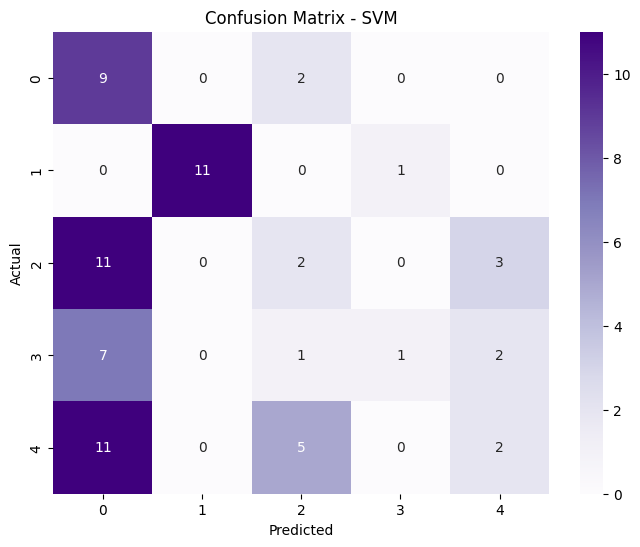

🎉 Model saved as 'svm_model.pkl'


In [8]:
import pandas as pd
import time
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M", "V"])
y = df["M"] - 1

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = SVC(kernel="rbf", probability=True)

# Train
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ SVM Accuracy: {accuracy:.4f}")
print(f"🕒 Training Time: {end_time - start_time:.2f} seconds")
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# Save model
joblib.dump(model, "svm_model.pkl")
print("🎉 Model saved as 'svm_model.pkl'")


SVM Hyperparameter Tuning with Optuna

In [ ]:
import pandas as pd
import optuna
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare data
X = df.drop(columns=["M", "V"])
y = df["M"] - 1  # Adjusting target as M - 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    C = trial.suggest_loguniform("C", 1e-3, 1e3)  # Regularization parameter
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])  # Kernel type
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"])  # Kernel coefficient
    degree = trial.suggest_int("degree", 2, 5)  # Degree for polynomial kernel

    # Initialize SVM model with suggested hyperparameters
    model = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree, random_state=42)

    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create and optimize the study using Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Output the best hyperparameters and accuracy
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best Accuracy: {study.best_value:.4f}")

# Train the final model with the best hyperparameters
best_params = study.best_params
final_model = SVC(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Final SVM Accuracy: {accuracy:.4f}")

# Save the final model
joblib.dump(final_model, "best_svm_model_optuna.pkl")
print("🎉 Model saved as 'best_svm_model_optuna.pkl'")


MLP Classifer

The MLP (Multilayer Perceptron) classifier is a type of artificial neural network that is commonly used for supervised learning tasks such as classification. It is a feedforward neural network, meaning that the information moves only in one direction, from the input layer to the output layer, through one or more hidden layers. MLPs are particularly suited for complex classification problems, especially those where traditional algorithms may struggle to capture non-linear relationships in the data.

Key Components of an MLP Classifier:
Input Layer:

This is where the data enters the network. Each node (neuron) in the input layer corresponds to a feature in your dataset.

Hidden Layers:

These are intermediate layers between the input and output layers. The number of neurons in these layers, and the number of hidden layers themselves, can be configured.

Each hidden layer performs computations on the data through the neurons, which use activation functions (like ReLU, Sigmoid, or Tanh) to introduce non-linearity.

The more hidden layers and neurons you use, the more powerful the model becomes, but also more prone to overfitting if not controlled.

Output Layer:

The output layer produces the final result. For classification, this layer typically contains one node per class (in the case of multi-class classification), and the output will represent the probabilities of each class.

Activation Functions:

ReLU (Rectified Linear Unit): The most common activation function used in the hidden layers, which helps with non-linearity and mitigates the vanishing gradient problem.

Sigmoid or Softmax: These are typically used in the output layer for binary and multi-class classification, respectively. They normalize the output to a probability distribution.

Weights and Biases:

Each connection between neurons has a weight that signifies the strength of the connection, and each neuron has a bias that shifts the activation function.

These weights and biases are adjusted during training through a process called backpropagation, which optimizes the network using an optimization algorithm like gradient descent.

In [ ]:
import pandas as pd
import joblib
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("transformed_land_mines.csv")
X = df.drop(columns=["M", "V"])
y = df["M"] - 1

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Optuna objective function with pruning
def objective(trial):
    hidden_layer_sizes = trial.suggest_categorical(
        "hidden_layer_sizes", [(128, 128), (256, 128), (256, 128), (256, 128, 64), (256, 128, 64)]
    )
    alpha = trial.suggest_float("alpha", 1e-5, 1e-2, log=True)
    learning_rate_init = trial.suggest_float("learning_rate_init", 2e-4, 1e-1, log=True)
    max_iter = trial.suggest_int("max_iter", 300, 800)

    clf = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation="relu",
        solver="adam",
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        max_iter=max_iter,
        random_state=42
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Report intermediate accuracy 
    trial.report(accuracy, step=1)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    return accuracy

# Run Optuna study with pruning
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=100, timeout=600)  # Add timeout or other limits if needed

# Print best params
print("🔧 Best Hyperparameters:")
print(study.best_params)
print(f"🏆 Best Accuracy: {study.best_value:.4f}")

# Train final model
best_params = study.best_params
final_model = MLPClassifier(
    **best_params,
    activation="relu",
    solver="adam",
    random_state=42
)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn for classes 0 to 4
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=[f'Pred Class {i}' for i in range(5)], 
            yticklabels=[f'True Class {i}' for i in range(5)])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Classes 0 to 4)')
plt.show()

print(f"\n✅ Final MLP Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"\n📊 Classification Report:\n{classification_report(y_test, y_pred)}")

# Save model and scaler
joblib.dump(final_model, "mlp_optuna_best_relu.pkl")
joblib.dump(scaler, "scaler_optuna_best_relu.pkl")


Model Training: MLP Classifer

🕒 Training Time: 0.51 seconds

✅ Final MLP Accuracy: 0.7941

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       1.00      1.00      1.00        14
           2       0.71      0.38      0.50        13
           3       0.75      0.92      0.83        13
           4       0.69      0.69      0.69        13

    accuracy                           0.79        68
   macro avg       0.79      0.79      0.77        68
weighted avg       0.79      0.79      0.78        68



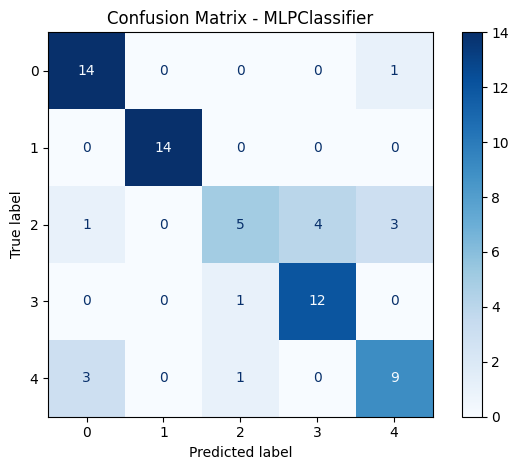

['scaler_optuna_best_relu.pkl']

In [2]:
import pandas as pd
import joblib
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("transformed_land_mines.csv")

# Prepare features and labels
X = df.drop(columns=["M", "V"])
y = df["M"] - 1  # Shift labels from 1–5 to 0–4

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Define the MLP model
clf = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    alpha=1.5533844813198423e-05,
    learning_rate_init=0.012213599390700235,
    max_iter=587,
    activation="relu",
    solver="adam",
    random_state=42
)

# Train the model and record time
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
print(f"🕒 Training Time: {end_time - start_time:.2f} seconds")

# Evaluate model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Final MLP Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=[0, 1, 2, 3, 4], cmap="Blues"
)
plt.title("Confusion Matrix - MLPClassifier")
plt.tight_layout()
plt.show()

# Save model and scaler
joblib.dump(clf, "mlp_optuna_best_relu.pkl")
joblib.dump(scaler, "scaler_optuna_best_relu.pkl")
